# 2.1 Эмбеддинг слов

## Векторное представление слов
- BoW
- Tf-idf
- LSA

Как представлять текст в компьютере?

Текст - это набор слов. Как представлять слова?

### OHE

cat = [1, 0, ......, 0]
dog = [0, 1, ......, 0]
...


<b>Недостатки: </b>
- Векторы слов не отражают смысл слова ([0,1,0] близко к [0,0,1] Так же как и [1,0,0]. Нельзя измерить "похожесть" двух слов по смыслу
- Векторы довольно разрежены, требуют много лишней памяти
- Размер словаря ограничен.
Слова, не попавшие в словарь, не могут быть обработаны
- При изменении размера словаря нужно пересчитывать векторы заново.

### Мешок слов (Bag of Words, BoG)

Пример:

1. a cat and a dog are sleeping
2. a dog is walking

Словарь:
1. a
2. and
...
678. is
1537. sleeping

BoW для этих предложений:
```
1. [2, 1, 0, ... 3, ... 0...]
2. [1, 0, 0, ... 0, ... 1...]
    1  2  3    678    1537
```

<b> Недостатки те же как и в OHE</b>

Еще один недостаток BoW - различные слова могут иметь разную важность для текста.

1. a cat and a dog are sleeping
1. [2, 1, 0, ... 3, ... 0...]
2. a dog is walking
2. [1, 0, 0, ... 0, ... 1...]

### Tf-IDF

tf-idf(t,d,D) - это мера важности слова t для документа d в наборе документов D.

$tf-idf(t,d,D) = tf(t, d) * idf(t, D)$

Terf Frequency tf(t, d) считается для слова и документа

$tf(t, d) = n_t/\sum_k{n_k}$\
$n_t$ - кол-во раз которое слово t встречается в документе d\
$\sum_k{n_k}$ - кол-во слов в документе d

$tf('a', doc_1) = 1/4 = 0.25$\
$tf('a', doc_2) = 1/4 = 0.25$

Inverse document frequency idf(t, D) - считается для слова и набора документов

$idf(t,D) = log{\frac{|D|}{|\{d_i ∈ D | t ∈ d_i\}|}}$

$|D|$ - кол-во документов в наборе

$|\{d_i ∈ D | t ∈ d_i\}|$ - кол-во документов, в которых встречается слово t

$idf('a',D) = log(2/2) = log(1) = 0$

```
tf-idf('a',doc_1,D) = 0.25*0 = 0
tf-idf('a',doc_2,D) = 0.25*0 = 0

Как результат:
1. a dog eats meat
2. a dog hunts cat

1. [ 0, ..., 0, ..., 0.075, ... 0, ... 0, ...]
2. [ 0, ..., 0, .., 0, ..0.075, .. 0.075,..,0.075, ...]
     a ... dog    eats      hunts       cat       meat
```

Еще примеры использования TF-IDF:
- Ранжирование поисковой выдачи
- Выделение ключевых слов и суммаризация текста.

<b> Плюсы:</b>
- Векторы имеют больший смысл, чем при BoW
- Возможность решать такие задачи как ранжирование документов и выделение ключевых слов

<b> Минусы:</b>
- Векторы довольно разрежены
- Фиксированный размер словаря
- При изменении коллекции документов векторы нужно пересчитывать

### Латентный семантический анализ


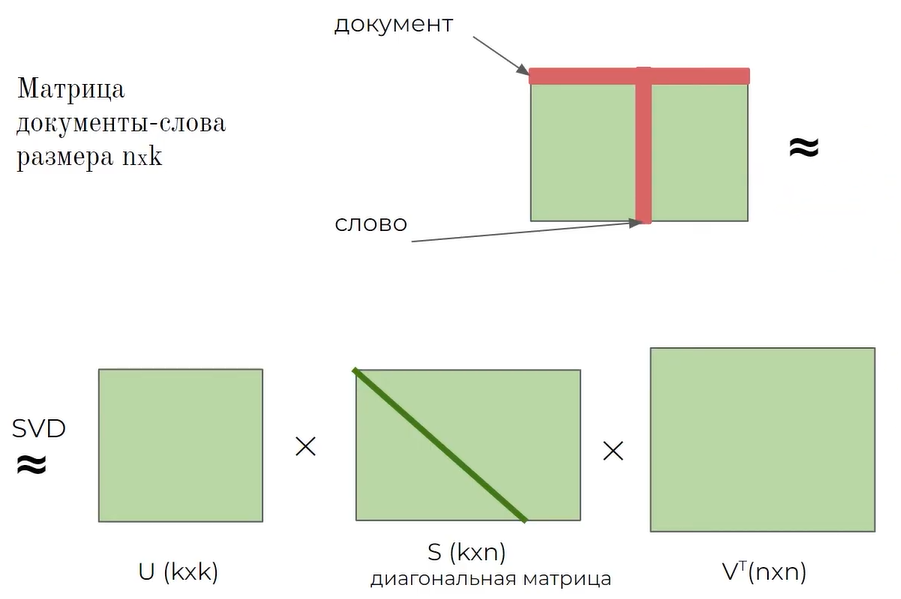

Применим метод снижения размерности к векторам документов и визуализируем их точками на плоскости.

Видно, что точки разбились на 3 кластера по темам
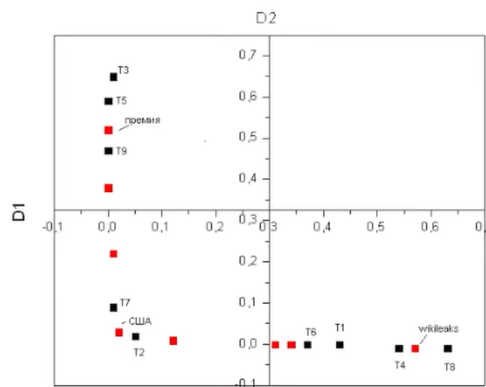

Если убрать некоторое число столбцов в 1й матрице и строк в 3й, то придем к новым размерностям.

Здесь при перемножении этих матриц информативность примерно равна изначальным произведениям матриц до сокращения.

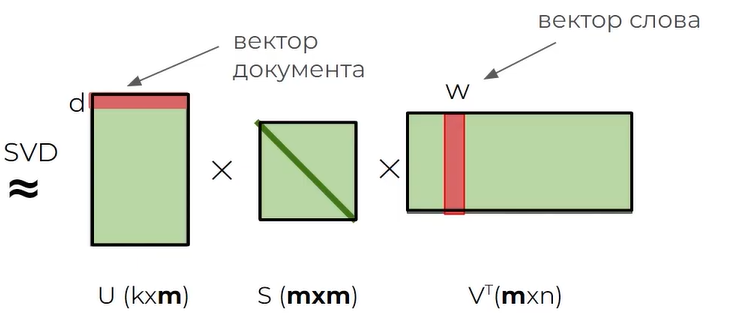

<b> Плюсы:</b>

- Векторы имеют смысл
- Возможность уменьшать размер эмбеддингов без существенной потери качества

<b> Недостатки: </b>

- Большая вычислительная сложность при большом количестве документов
- Фиксированный размер словаря
- При изменении коллекции документов векторы нужно пересчитывать
- Вероятностная модель метода не соответствует реальности

<b>Итого: </b>
В этом видео мы разобрали несколько вариантов векторых представлений слов, обсудили их достоинства и недостатки:
* Bag of Words (BoW)
* Tf-idf
* Латентный семантический анализ

Дальше мы обсудим еще несколько вариантов представлений слов в векторном виде и узнаем, что такое эмбеддинги.


## Эмбеддинги слов
* Контекстные эмбеддинги
* Word2Vec
* Glo Ve, FastText

### Контекстные векторы слов

Рассмотрим три предложения и слова-кандидаты для пропусков:
1. Маша ездит на ___
2. Колесо ___ было проколото
3. У ___ красивая белая рама

```
          1  2  3
Велосипед +  +  +
Мотоцикл  +  +  +
Машина    +  +  -
Лошадь    +  -  -
```

Идея - смысл слова определяется контекстом.

Построим векторы слов на основе контекста:

```
        a    horse ride bicycle frame rose
a       -    256   45   230     90    134
horse   265  -     137  4       2     5
----------------------------------------
ride    45   137   -    120     34    3    - вектор слова - строка матрицы
----------------------------------------
bicycle ...
frame                           -
rose    134  5     3    2       0     -
```
<b> Плюсы: </b>
- Векторы начинают отражать смысл слов! Их можно сравнить на схожесть по расстоянию (cosine distance/MSE)

<b> Минусы: </b>
- Векторы довольно разрежены
- Фиксированный размер словаря
- При изменении коллекции документов векторы нужно пересчитывать
- Векторы редких слов не очень информативны

Чтобы уменьшить размер - можем применить метод понижения размерности (PCA, TSNE)
(к примеру, вместо 50000 слов останется вектор размера 500)

Либо применение SVD аналогично только применяем ее к матрице векторов слов - последней таблице. (Матрица Слово-Слово а не так, как на картинке по SVD(Документ-Слово).

### Эмбеддинги слов

Все, что мы делали до сих пор - на основе каких-то соображений строили векторы/матрицы слов/документов, которые как-то отражали смысл слов/документов.

А что если попытаться выучить векторы слов/документов?

Что мы хотим?

Мы хотим выучить векторы слов небольшой размерности, которые отражали бы смысл слов: их можно было бы сравнить между собой с помощью некой метрики.

Такие выученные векторы мы будем называть <b> эмбеддингами слов </b>


## Word2Vec

Мы будем учить нейросеть по слову предсказывать слова, которые могут находиться в контексте (стоять вокруг этого слова).

Наш датасет - набор текстов. мы будем идти по датасету скользим окном размера 5, и в каждом положении окна по центральному слову учить нейросеть предсказывать слова, находящиеся в текущем окне.

По центральному слову определяем ближайшие к нему 2 слева и справа

... problems turung <u> into </u> banking crises as ...

... $P(w_{t-2}|w_t)$ $P(w_{t-1}|w_t)$ ___ $P(w_{t+1}|w_t)$  $P(w_{t+2}|w_t)$ ...

<b> Формируем задачу: </b>
- Ставится задача классификации. Количество классов - размер словаря n.
- На вход нейросеть принимает слово, выдает n значений - распределение на слова в словаре
- Лосс-функция - кросс-энтропия между распределением, выданным сетью, и верным распределением (OHE векторами)


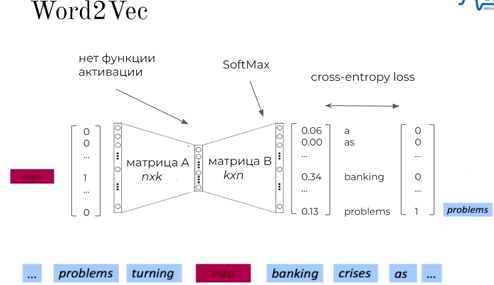

Здесь k - размер скрытого слоя.

На входе векторное OHE представление слова.

Перерисуем для упрощения (напоминаю, что тут нет функции активации)

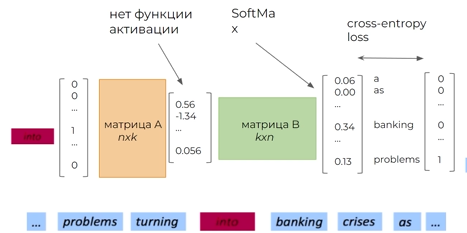

Для into сначала обучаем таргет problems, потом аналогично turning, bankin, crises.


Сначала OHE вектор умножается на матрицу А и получается вектор с j и далее этот вектор умножается на 2ю матрицу В.

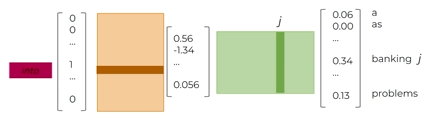

Как результат: banking j - это скалярное произведение i-го вектора первой матрицы и j-го столбца 2-й матрицы.

Что отсюда следует: если возьмем матрицу А и строки этой матрицы можем считать векторами слов из словаря. Т.е. i-я строка из А - эмбеддинг i-го слова из словаря.

Нейросеть учит такие векторы слов, чтобы скалярное произведение между векторами двух слов, которые часто испльзуются в контексте, были как можно больше.

После обучения можно взять матрицу А или В как эмбеддинги этих слов. Различие только в том, что А - центральное слово, около которого ищется контекст. Однако эти эмбеддинги будут работать одинаково.

После обучения сети мы получаем векторы размера k для всех слов в словаре.

Рзамер k мы можем задавать самии.

Эти векторы содержат смысл слов. Их можно сравнивать между собой с помощью косинусного расстояния.

<i> Косинусное расстояние </i> - это нормализованное скалярное произведение двух векторов.

$similarity(A,B) = AB/(||A||*||B||) = \sum^n_{i=1}{\frac{A_i*B_i}{\sqrt{\sum^n_{i=1}A^2_i} * \sqrt{\sum^n_{i=1}B^2_i}}}$

На векторах word2vec можно проводить векторную аифметику:

$v(king) - v(man) + v(woman) ≈ v(queen)$

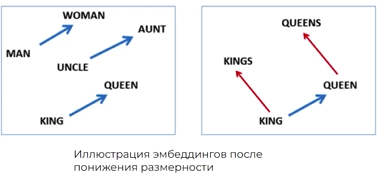

Пример 2:

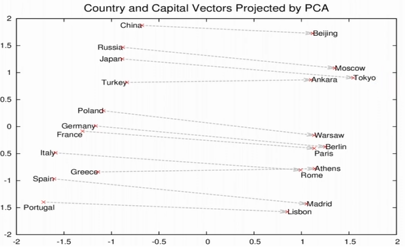

Как результат - примерно смысл тот же

<b> Преимущества:</b>
- Векторы отражают смысл слов
- Размерность векторов не зависит от размера словаря
- При добавлении документов векторы можно дообучить

<b> Недостатки: </b>
- Фиксированный размер словаря. При изменении размера словаря документов векторы нужно пересчитывать
- Для редких слов эмбеддинги получаются неоптимальными
- слова, имеющие один корень, обрабатываются нейросетью по-разному.
<i>eat, eater,  eating </i>


<i> Skip-Gram</i> - метод, при котором по слову определяем контекст

<i> CBOW </i> - метод, при котором по словам контекста называется

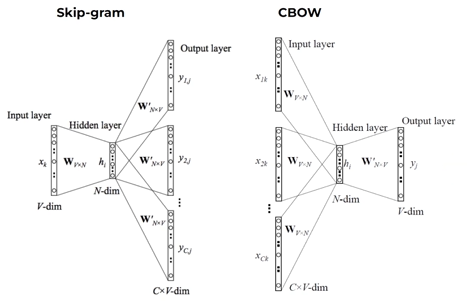

<b> Итого</b>
Мы:
- познакомились с идеей того, что смысл слова можно определять через контекст
- построили эмбеддинги слов word2vec

Проблемы при работе с Word2Vec - при расчете SoftMax огромное количество времени и памяти

Идеи решения проблемы:
- Иерархический SoftMax
- Negative sampling

Word2vec с negative sampling получает эмбеддинги, похожие на эмбеддинги из SVD-разложения

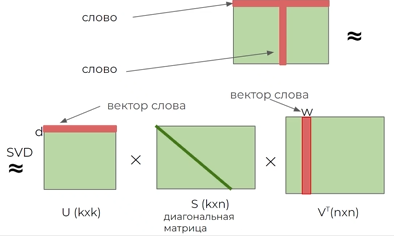


## FastText

Идея - будем строить векторы для частей слов, а не для целых слов.
- Делим слова на n-граммы по буквам: apple = <ap, ppl, ple, le>
- Учим векторы для n-грамм
- Вектор слова получаем как суму векторов его n-грамм.

<b>Плюсы: </b>

- Можно получить более адекватные эмбеддинги для редких и неизвестных слов

<b>Минусы: </b>

- n-грамм может быть очень много. Требуется больше вычислительных ресурсов.


<i> BPI</i> - более качественно делит слова на n-граммы.


## Glo Ve (Global Vectors)

Glo Ve использует статистическую информацию о частоте встречаемости слов и фраз в тексте, чтобы улучшить обучение эмбеддингов редких слов.

Подробнее можно почитать...

# Эмбеддинги фраз и предложений

Как можно использовать идею для получения эмбеддингов слов, чтобы получить эмбеддинги предложений?

Что мы делали со словами:
- Предсказывали следующее/предыдущее слово.

Что можно делать для предложений:
- Предсказывать порядок следования двух предложений (бинарная классификация)
- Может ли предложение А идти после предложения В? (бинарная или многоклассовая классификация)
- Предсказание соединительного слова между двумя предложениями.

Обучаясь на подобные задачи, нейросеть выучивает некую информацию о предложениях.

## Классификация текста с помощью эмбеддингов

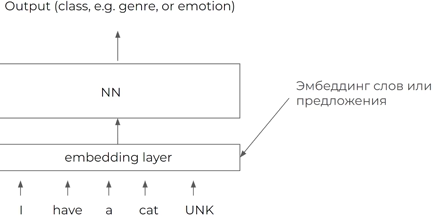

## Карта языка

Пусть у нас есть тексты на неизвестном языке, которые мы хотим научиться понимать.

Как это можно сделать:
- Обучаем эмбеддинги для слов английского языка
- Обучаем эмбеддинги для неизвестного языка
- Находим преобразование f, которое переводит эмбеддинги английского языка в эмбеддинги неизвестного языка.

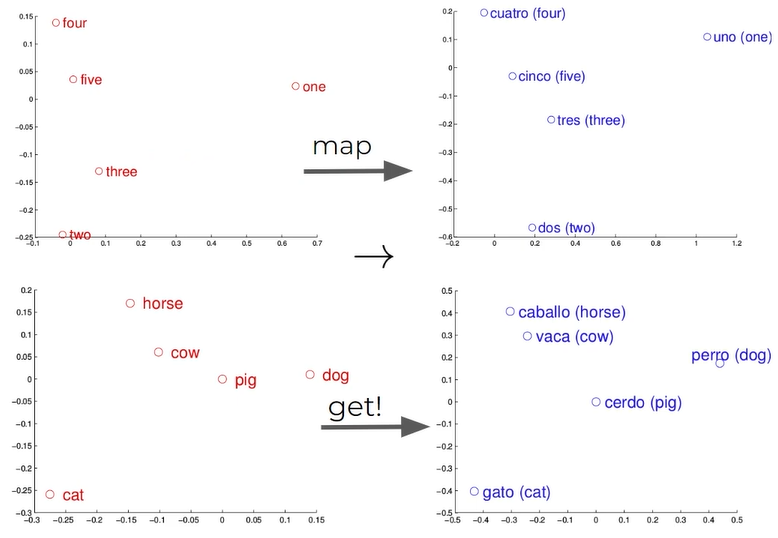

# Использование эмбеддингов



## Эмбеддинг в общем смысле

Эмбеддинг - векторное представление объекта, которое отражает информацию об обхекте.

Выходы слоев моделей, обученных под какую-либо задачу, тоже можно считать эмбеддингами.

Пример: картинка (кошка) - model(ImageNet or ...) - предпоследний слой (представление и осн. информации) [0.001, 0.1, ... 0.83, ...] - (эмбеддинг)

Пример: поиск похожих изображений
- Берем предобученную VGG16 на ImageNet
- Прогоняем все картинки датасета через модель, получаем выходы (эмбеддинги) предпоследнего слоя модели
- Для конкретной картинки ищем похожие, сравнивая эмбеддинги этой картинки с эмбеддингами других картинок датасета по MSE/косинусному расстоянию.

Итого:

- Разобрали некоторые недостатки word2vec и способы их решения
- Узнали, как использовать эмбеддинги для решения задач на текстах
- Обсудили эмбеддинги фраз и предложений, а также общий смысл слова эмбеддинг.

# Понятие эмбеддинга в общем виде






<b> </b>
<b> </b>

In [ ]:
<b> </b>
<i> </i>
<u> </u>
